##  Dataset Preparation

### Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Download the data 

In [2]:
data = pd.read_csv('diabetes.csv') 
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Understanding the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data['BMI'] = data['BMI'].astype('int64')
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   SkinThickness             768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    int64
 6   DiabetesPedigreeFunction  768 non-null    int64
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int64
dtypes: int64(9)
memory usage: 54.1 KB


In [5]:
for col in data.drop(['Outcome'], axis = 1).columns:
    print(f"{col:25} -------> {data[col].nunique():10} unique values")

Pregnancies               ------->         17 unique values
Glucose                   ------->        136 unique values
BloodPressure             ------->         47 unique values
SkinThickness             ------->         51 unique values
Insulin                   ------->        186 unique values
BMI                       ------->         40 unique values
DiabetesPedigreeFunction  ------->          3 unique values
Age                       ------->         52 unique values


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.0,1.0,3.0,6.00,17.0
Glucose,768.0,120.894531,31.972618,0.0,99.0,117.0,140.25,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,62.0,72.0,80.00,122.0
SkinThickness,768.0,20.536458,15.952218,0.0,0.0,23.0,32.00,99.0
Insulin,768.0,79.799479,115.244002,0.0,0.0,30.5,127.25,846.0
BMI,768.0,31.548177,7.860602,0.0,27.0,32.0,36.00,67.0
DiabetesPedigreeFunction,768.0,0.071615,0.277494,0.0,0.0,0.0,0.00,2.0
Age,768.0,33.240885,11.760232,21.0,24.0,29.0,41.00,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.0,0.0,1.00,1.0


In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.016501,-0.014610,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.218293,0.133843,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.279822,0.066559,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.393608,0.122670,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197368,0.119496,-0.042163,0.130548
BMI,0.016501,0.218293,0.279822,0.393608,0.197368,1.000000,0.109890,0.034266,0.292494
DiabetesPedigreeFunction,-0.014610,0.133843,0.066559,0.122670,0.119496,0.109890,1.000000,0.032661,0.126164
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.034266,0.032661,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292494,0.126164,0.238356,1.000000


<AxesSubplot:>

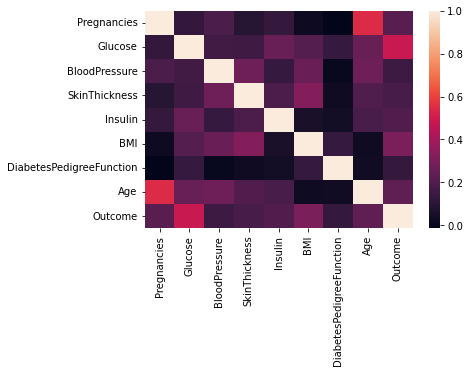

In [25]:
sns.heatmap(data.corr())

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

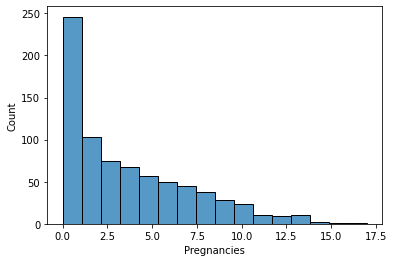

In [9]:
sns.histplot(data['Pregnancies'])

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

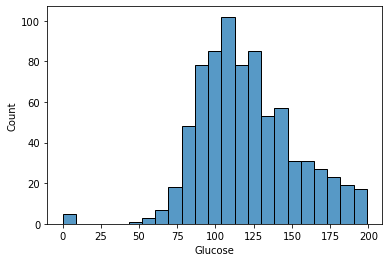

In [10]:
sns.histplot(data['Glucose'])

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

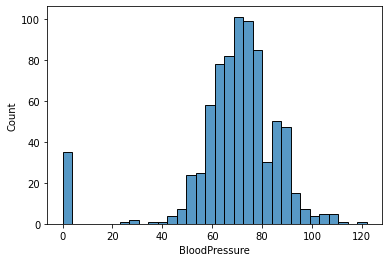

In [11]:
sns.histplot(data['BloodPressure'])

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

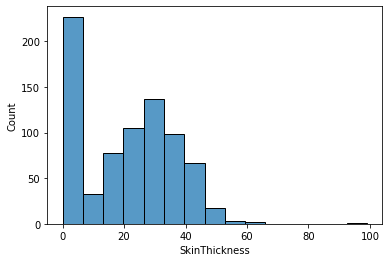

In [12]:
sns.histplot(data['SkinThickness'])

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

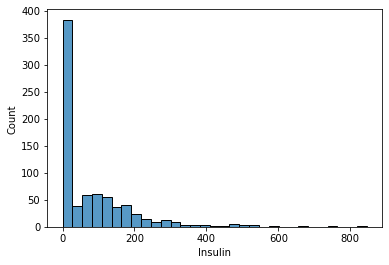

In [13]:
sns.histplot(data['Insulin'])

<AxesSubplot:xlabel='BMI', ylabel='Count'>

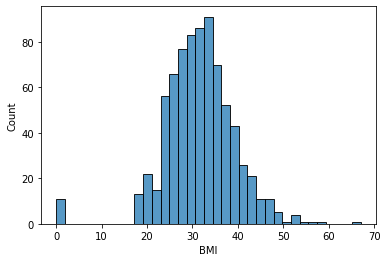

In [14]:
sns.histplot(data['BMI'])

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

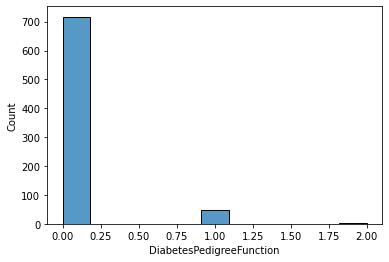

In [15]:
sns.histplot(data['DiabetesPedigreeFunction'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

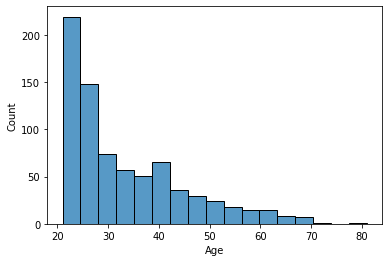

In [16]:
sns.histplot(data['Age'])

In [17]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
np.random.seed(18)

for column in columns:
    mean = data[column].mean()
    std = data[column].std()
    
    col_values = data[column].values
    
    for i, val in enumerate(col_values):
        if val == 0:
            col_values[i] = mean + (3 * std * np.random.random())
    
    data[column] = pd.Series(col_values)

 
    
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.0,1.00,3.0,6.0,17.0
Glucose,768.0,122.062500,30.851772,44.0,99.75,117.0,141.0,205.0
BloodPressure,768.0,73.643229,13.780182,24.0,64.00,72.0,82.0,126.0
SkinThickness,768.0,33.747396,13.645875,7.0,23.75,32.0,41.0,99.0
Insulin,768.0,200.074219,119.613735,14.0,105.00,175.0,284.0,846.0
BMI,768.0,32.152344,7.021217,18.0,27.00,32.0,36.0,67.0
DiabetesPedigreeFunction,768.0,0.071615,0.277494,0.0,0.00,0.0,0.0,2.0
Age,768.0,33.240885,11.760232,21.0,24.00,29.0,41.0,81.0
Outcome,768.0,0.348958,0.476951,0.0,0.00,0.0,1.0,1.0


<AxesSubplot:xlabel='Glucose', ylabel='Count'>

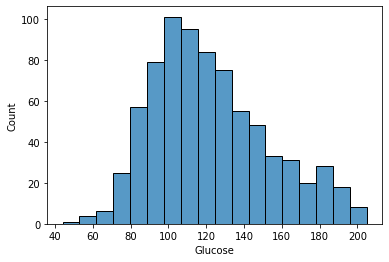

In [18]:
sns.histplot(data['Glucose'])

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

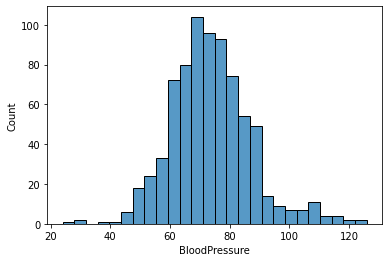

In [19]:
sns.histplot(data['BloodPressure'])

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

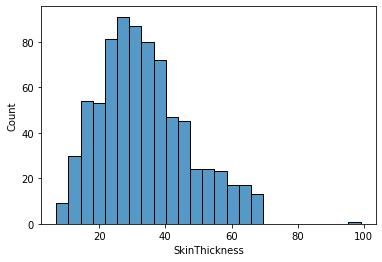

In [20]:
sns.histplot(data['SkinThickness'])

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

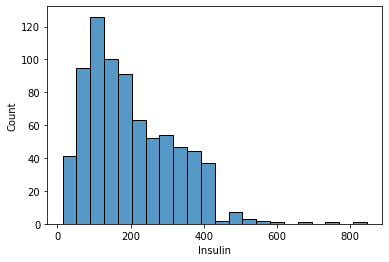

In [21]:
sns.histplot(data['Insulin'])

<AxesSubplot:xlabel='BMI', ylabel='Count'>

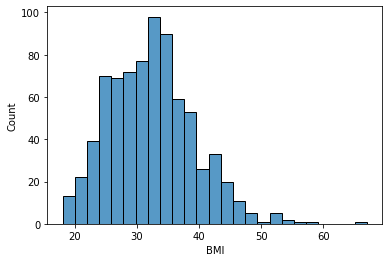

In [22]:
sns.histplot(data['BMI'])

### Visualize the data

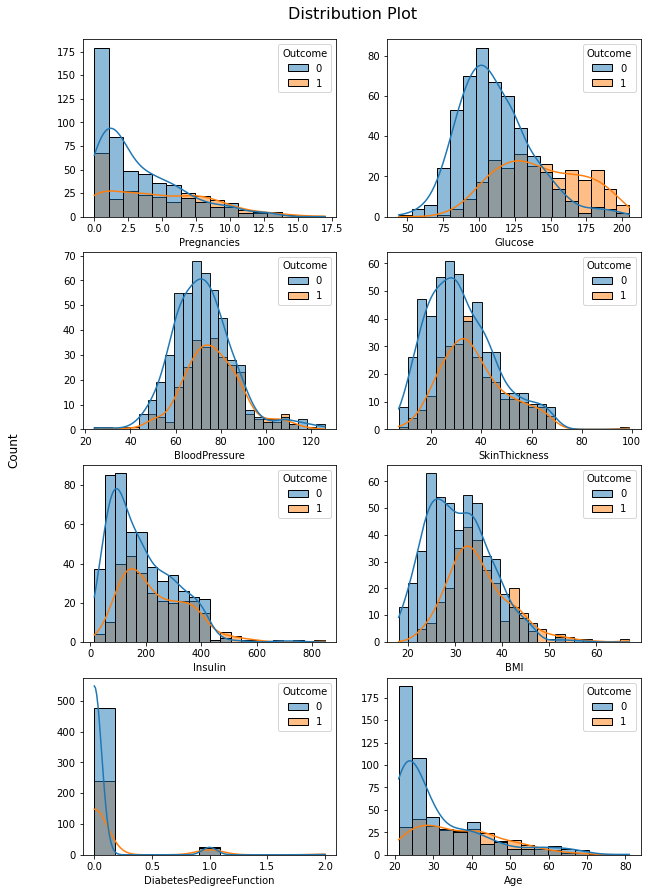

In [34]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (10,15))
axes = axes.ravel()

for i, col in enumerate(data.drop(['Outcome'], axis = 1).columns):
    sns.histplot(data = data, x = data[col], ax = axes[i], kde = True, hue = data['Outcome'])
    axes[i].set_ylabel('')
    
fig.supylabel('Count')
fig.suptitle('Distribution Plot', y = 0.91, fontsize = 16)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

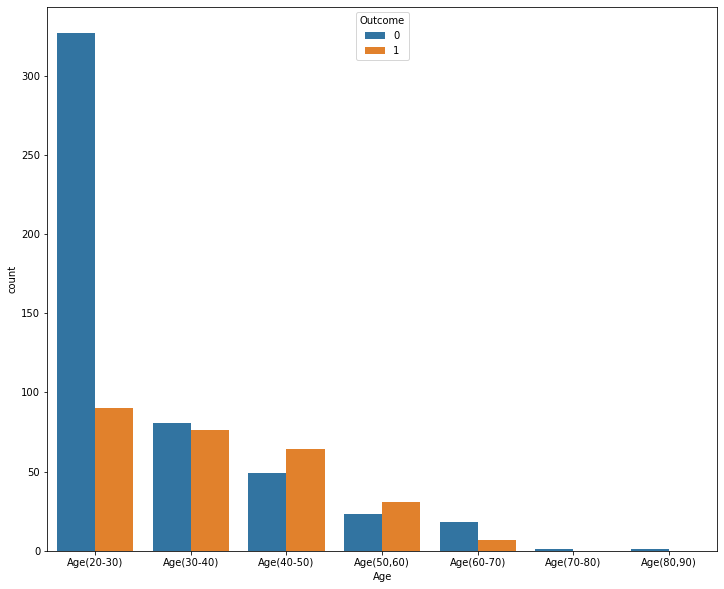

In [28]:
age_bins = pd.cut(data['Age'], bins= [20, 30, 40, 50, 60, 70, 80, 90],
                  labels=["Age(20-30)","Age(30-40)","Age(40-50)","Age(50,60)","Age(60-70)","Age(70-80)","Age(80,90)"])

plt.figure(figsize=(12,10))
sns.countplot(age_bins,hue=data["Outcome"])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

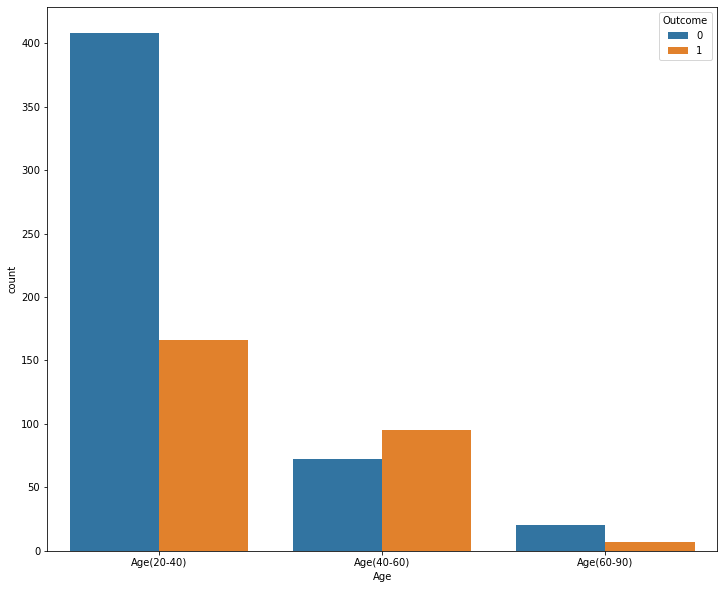

In [33]:
age_bins_3 = pd.cut(data['Age'], bins= [20, 40, 60,90],
                  labels=["Age(20-40)","Age(40-60)","Age(60-90)"])

plt.figure(figsize=(12,10))
sns.countplot(age_bins_3,hue=data["Outcome"])